In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C, Vc0, Vcp0, I0, Vin = 10, 0.00025, 0.00003, 0, 0, 0, 5

ts = []
Vcs = []
Is = []

Td = np.linspace(0, 1 / 200000, 100)

for i in range(1000):
    T = np.linspace(i / 200000 * 2, i / 200000 * 2 + 1 / 200000, 100)

    Vc_on = co.tf([R * C * Vc0], [R * C, 1])
    I_on = co.tf([L * I0, Vin], [L, 0, 0])
    _, Vc_on_res = co.impulse_response(Vc_on, T=Td)
    _, I_on_res = co.impulse_response(I_on, T=Td)
    ts += T.tolist()
    Vcs += Vc_on_res.tolist()
    Is += I_on_res.tolist()
    
    Vc0 = Vc_on_res[-1]
    I0 = I_on_res[-1]
    Vcp0 = 1 / C * I_on_res[-1]
    
    T = np.linspace(i / 200000 * 2 + 1 / 200000, i / 200000 * 2 + 2 / 200000, 100)

    Vc_off = co.tf([Vc0, Vcp0 + 1 / (R * C) * Vc0, Vin / (L * C)], [1, 1 / (R * C), 1 / (L * C), 0])
    I_off = co.tf([C, 1 / R], [1]) * Vc_off - co.tf([Vc0 * C], [1])
    _, Vc_off_res = co.impulse_response(Vc_off, T=Td)
    _, I_off_res = co.impulse_response(I_off, T=Td)
    ts += T.tolist()
    Vcs += Vc_off_res.tolist()
    Is += I_on_res.tolist()
    
    Vc0 = Vc_off_res[-1]
    I0 = I_off_res[-1]
    Vcp0 = 1 / C * I_off_res[-1]


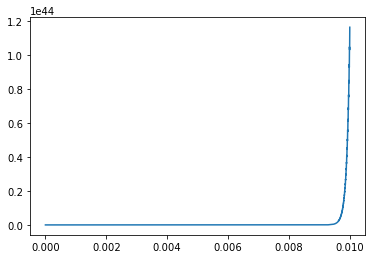

In [3]:
plt.plot(ts, Vcs)

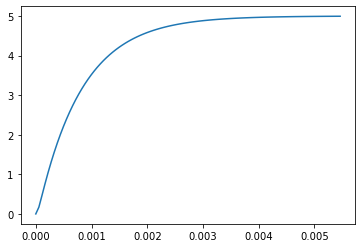

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C = 10, 0.00033, 0.0000033
Doff= 0.2

G = co.tf([1], [L * C / Doff, 1 / Doff * L / R, Doff])
t, y = co.step_response(G)

plt.plot(t, y)


(array([1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.25000000e+02,
        1.25000000e+02, 1.25000000e+02, 1.25000000e+02, 1.250000

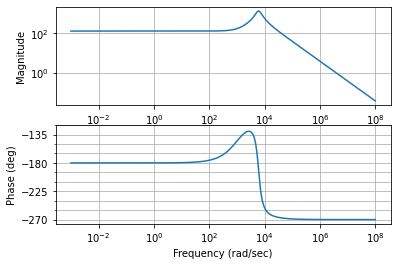

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R, L, C = 100, 0.00033, 0.0000033
D = 0.8
Vin = 5
Vof = Vin / (1 - D)
ILf = Vof / 2

G = co.tf([-ILf * L, -(1 - D) * Vof], [L * C, L / R, (1 - D) ** 2])

co.bode(G, omega=np.logspace(-3, 8, 1000))

(array([7.21795224, 7.16825535, 7.11890119, 7.06988741, 7.02121166,
        6.97287161, 6.92486495, 6.87718939, 6.82984265, 6.78282246,
        6.73612658, 6.68975277, 6.64369882, 6.59796252, 6.55254168,
        6.50743414, 6.46263774, 6.41815034, 6.3739698 , 6.33009402,
        6.28652091, 6.24324836, 6.20027432, 6.15759674, 6.11521357,
        6.07312278, 6.03132236, 5.98981032, 5.94858467, 5.90764343,
        5.86698465, 5.82660639, 5.78650672, 5.74668372, 5.70713548,
        5.66786011, 5.62885574, 5.59012049, 5.55165253, 5.51345001,
        5.4755111 , 5.43783398, 5.40041687, 5.36325796, 5.32635548,
        5.28970767, 5.25331278, 5.21716906, 5.18127478, 5.14562824,
        5.11022772, 5.07507154, 5.040158  , 5.00548545, 4.97105223,
        4.93685668, 4.90289718, 4.86917209, 4.83567982, 4.80241875,
        4.76938729, 4.73658387, 4.70400692, 4.67165488, 4.6395262 ,
        4.60761935, 4.5759328 , 4.54446504, 4.51321456, 4.48217986,
        4.45135947, 4.42075191, 4.39035572, 4.36

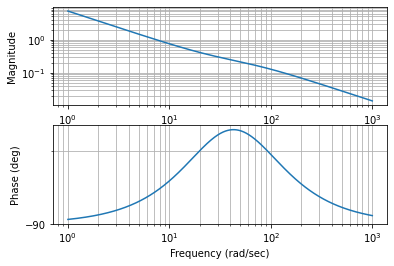

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import control as co

R1, R2, R4, C1, C3 = 2100, 1000, 400, 0.000033, 0.000033

Gc = co.tf([R2 * C1, 1], [R1 * C1 * C3 * R2, (C1 + C3) * R1, 0])

co.bode(Gc)